### Downloading the Dataset (kaggle)
Other alternatives to download can be: 
- **Manually** downloading the dataset and loading it.
- Using **kagglehub** instead of **kaggle**, and more...

In [ ]:
pip install kaggle

Note: you may need to restart the kernel to use updated packages.


####  Downloading and Loading the Dataset

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
import torch
import torch.nn as nn
import torch.functional as F
from torch.utils.data import DataLoader
from torchvision import transforms, datasets
import random
from pathlib import Path
import os

Download the dataset from `readme` and update `path_to_dataset` accordingly

In [3]:
path_to_dataset = "C:\\Users\\acer\\Desktop\\dataset"

In [18]:
from torchvision.transforms import v2
transform_augment = v2.Compose([
    v2.RandomRotation(degrees=30, expand=True, fill=0),
    v2.CenterCrop(224),
    
    v2.ToImage(),                                 # convert PIL → tensor
    v2.ToDtype(torch.float32, scale=True),        # scale to [0,1]
    v2.GaussianNoise(mean=0.0, sigma=0.01, clip=True)])

In [6]:
transform = transforms.Compose({
  transforms.Resize((224,224)),
  transforms.ToTensor()
})

`datasets.ImageFolder()` is default way to load images dataset if they are arranged in folder-like structure

In [7]:
dataset = datasets.ImageFolder(root=path_to_dataset, transform=transform)
dataloader = DataLoader(dataset=dataset, shuffle=True, batch_size=64)

In [6]:
print("Total number of images: ", len(dataset))

Total number of images:  4217


In [ ]:
image, label = dataset[0]
print(image.shape, f"label is: ",label)

torch.Size([3, 224, 224]) label is:  <class 'int'>


In [11]:
for image, label in dataset:
    print(image.shape, label)
    break

torch.Size([3, 224, 224]) 0


In [10]:
for images, labels in dataloader:
    print(images.shape, labels)
    break

torch.Size([64, 3, 224, 224]) tensor([1, 0, 1, 0, 3, 2, 2, 0, 0, 0, 1, 2, 1, 3, 1, 0, 1, 2, 0, 0, 2, 3, 3, 2,
        0, 3, 2, 0, 1, 0, 1, 1, 1, 0, 3, 0, 1, 3, 3, 0, 2, 0, 2, 3, 2, 3, 1, 3,
        3, 2, 0, 1, 2, 3, 0, 0, 0, 1, 0, 0, 0, 2, 0, 3])


In [17]:
dataset.classes

['cataract', 'diabetic_retinopathy', 'glaucoma', 'normal']

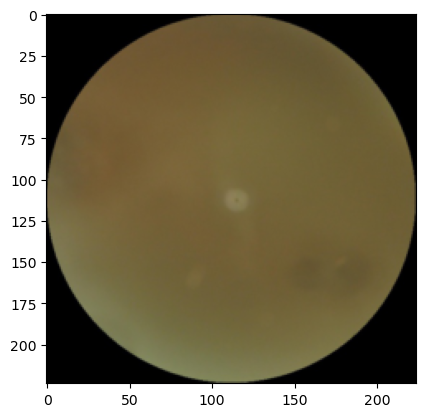

In [22]:
plt.imshow(torch.permute(image, (1,2,0)))

#### Rotating the dataset by angles between +30 and -30 degrees to address possible rotation invariance

In [24]:
augmentation = transforms.Compose({
  transforms.Resize((224,224)),
  transforms.RandomRotation(30),
  transforms.ToTensor()
})

In [25]:
augmented_dataset = datasets.ImageFolder(root=path_to_dataset, transform=augmentation)
augmented_dataloader = DataLoader(dataset=augmented_dataset, batch_size=64, shuffle=True)

Concatenating the original and augmented datasets using `torch.utils.data.ConcatDataset()`

In [26]:
dataset_full = torch.utils.data.ConcatDataset([dataset, augmented_dataset])

In [27]:
dataloader_full = DataLoader(dataset=dataset_full, batch_size=64, shuffle=True)

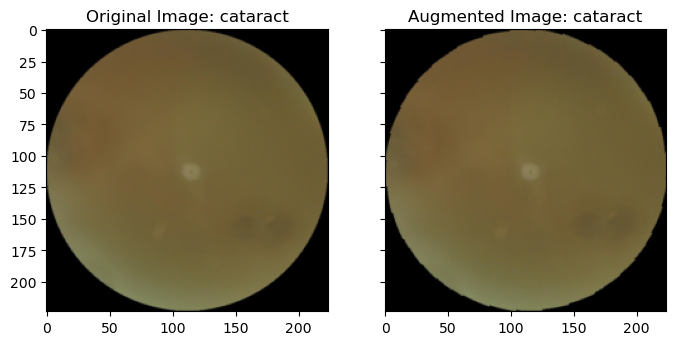

In [41]:
fig, (ax1, ax2) = plt.subplots(1,2,sharey=True,figsize=(8,8))
(image1, label1), (image2, label2) = dataset[0], augmented_dataset[0]

ax1.imshow(torch.permute(image1, (1,2,0)))
ax1.set_title(f"Original Image: {dataset.classes[label1]}")

ax2.imshow(torch.permute(image2, (1,2,0)))
ax2.set_title(f"Augmented Image: {dataset.classes[label2]}")

plt.savefig("../assets/plots/original_vs_augmented.png", bbox_inches="tight")
plt.show()